# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

In [46]:
previsaoRenda=pd.read_csv('previsão_de_renda.csv')
var_quantitativas=previsaoRenda[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]
var_quantitativas


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


In [3]:
var_quantitativas.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


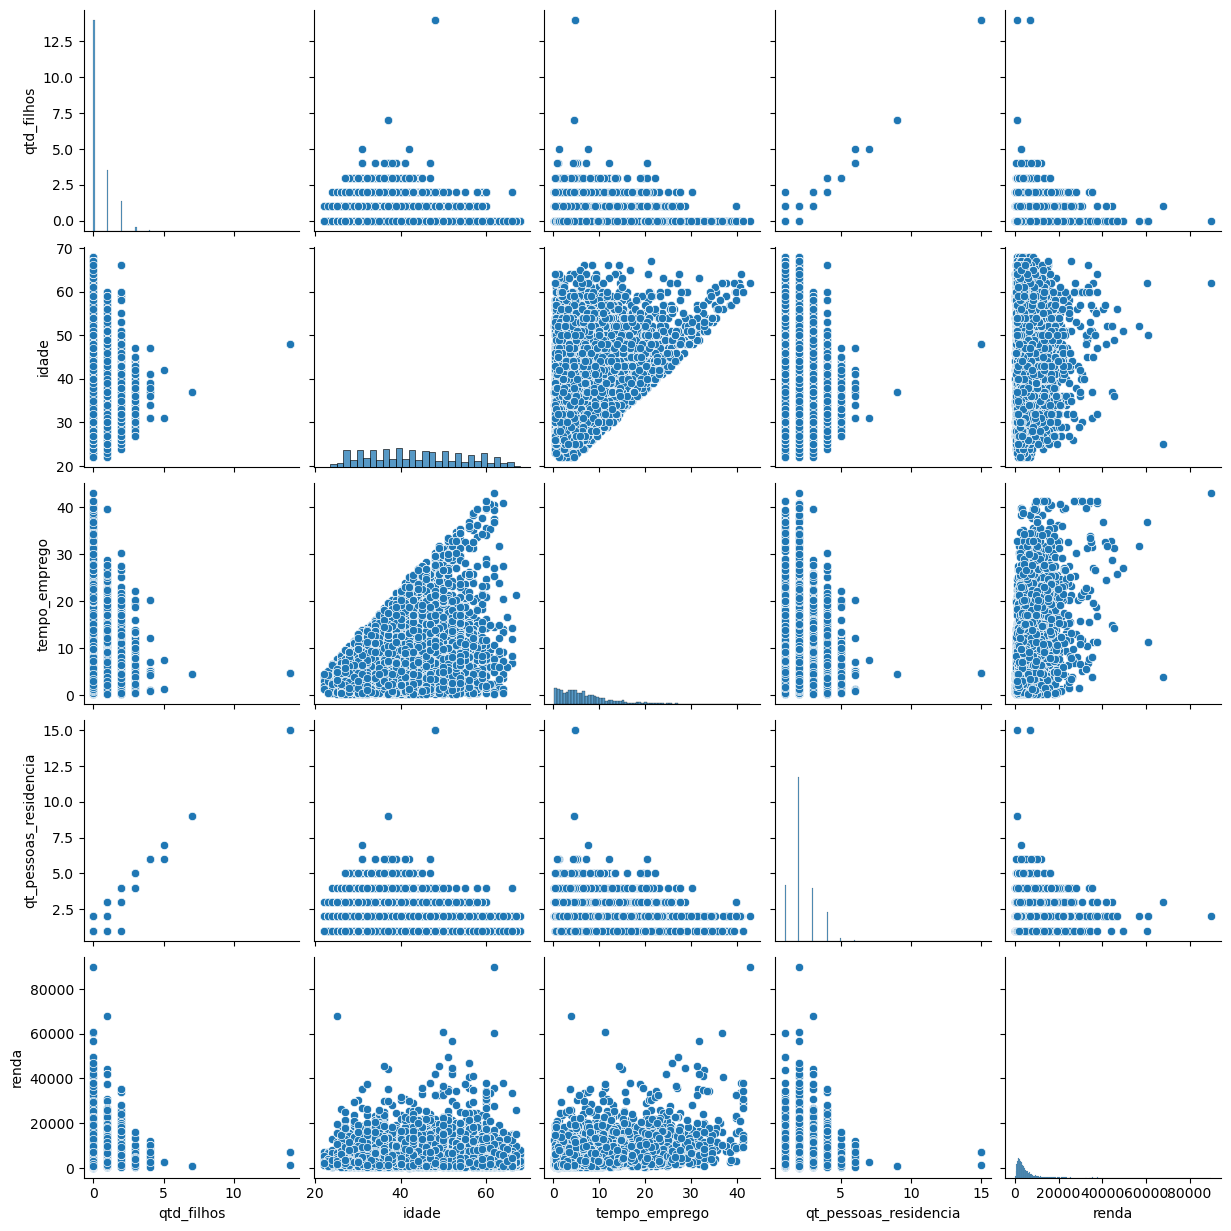

In [4]:
sns.pairplot(var_quantitativas)

###### As variavéis qt_pessoas_residencias e qtd_filhos são as que fazem mais sentido, a que tem maior correlação.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='idade', ylabel='tempo_emprego'>

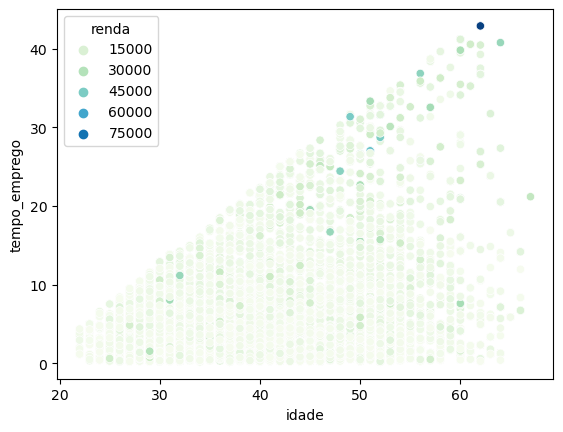

In [40]:
var_corr_renda=var_quantitativas[['tempo_emprego','idade','renda']]

sns.scatterplot(y= 'tempo_emprego',x='idade',data=var_corr_renda,hue='renda', palette="GnBu")

<Axes: xlabel='renda', ylabel='tempo_emprego'>

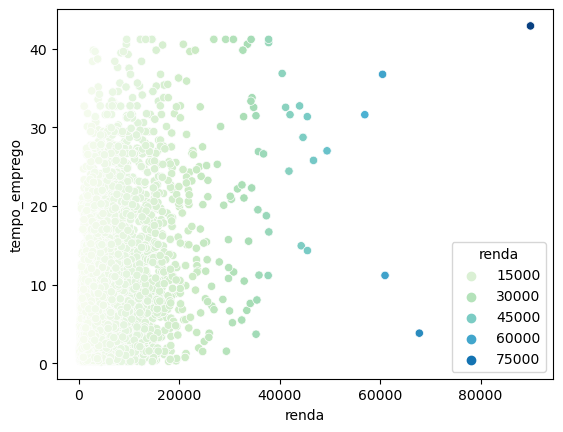

In [43]:
sns.scatterplot(y= 'tempo_emprego',x='renda',data=var_quantitativas[['tempo_emprego','renda']],hue='renda', palette="GnBu")

<Axes: xlabel='renda', ylabel='idade'>

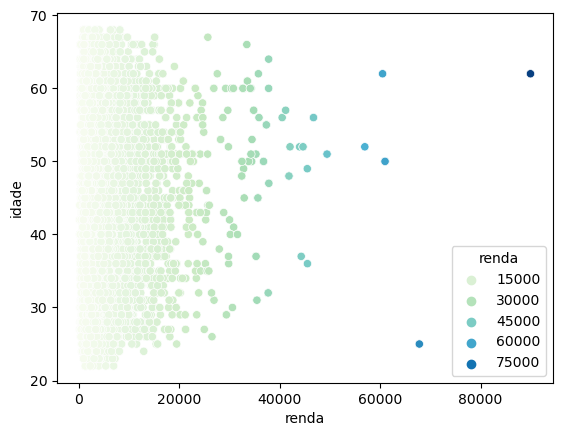

In [44]:
sns.scatterplot(y= 'idade',x='renda',data=var_quantitativas[['idade','renda']],hue='renda', palette="GnBu")

3) Na su aopinião, há outliers na variável renda?

Sim, há outliers na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

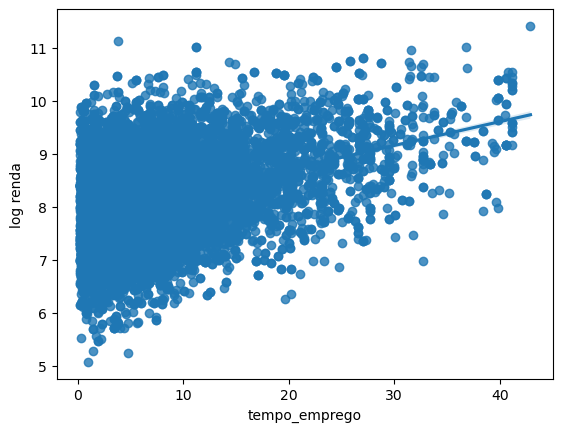

In [37]:
var_corr_renda_log=var_quantitativas.copy()
var_corr_renda_log['log renda']=np.log(var_corr_renda_log['renda'])
g1=sns.regplot(x='tempo_emprego', y='log renda', data=var_corr_renda_log)

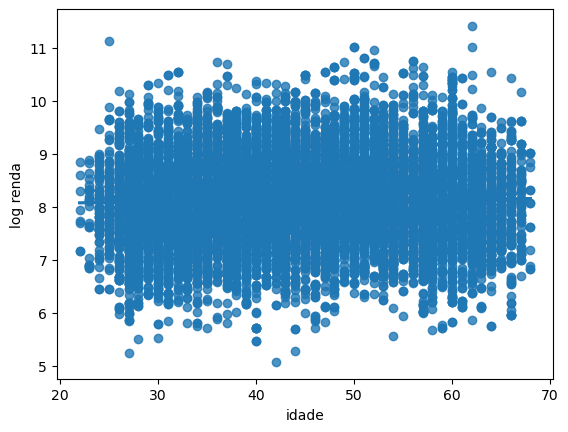

In [45]:
var_corr_renda_log=var_quantitativas.copy()
var_corr_renda_log['log renda']=np.log(var_corr_renda_log['renda'])
g1=sns.regplot(x='idade', y='log renda', data=var_corr_renda_log)


In [38]:
var_corr_renda_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acho que piorou, pois sem o LOG a correlação era :
idade= 0.042570       tempo_emprego=0.394235 

E após o LOG ficou:
idade=0.024712        tempo_emprego=0.379556